In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
import pandas as pd
import PIL.Image as Image
import os
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.utils.multiclass import unique_labels

In [3]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/Colab Notebooks/Breast Cancer/BUID Dataset.zip', 'r') as zipObj:

     zipObj.extractall('BreastCancer')

In [4]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import splitfolders
input_folder = '/content/BreastCancer/'

In [8]:
splitfolders.ratio(input_folder, output="dataset3",
                   seed=123, ratio=(.8, .1, .1), 
                   group_prefix=None)

Copying files: 779 files [00:00, 1506.55 files/s]


In [40]:
BATCH_SIZE = 64
IMAGE_SIZE = 224
CHANNELS=3
EPOCHS = 100

In [41]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/content/dataset3/train',
image_size= (IMAGE_SIZE, IMAGE_SIZE), batch_size= BATCH_SIZE)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/content/dataset3/test',
image_size= (IMAGE_SIZE, IMAGE_SIZE), batch_size= BATCH_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/content/dataset3/val',
image_size= (IMAGE_SIZE, IMAGE_SIZE), batch_size= BATCH_SIZE)

Found 622 files belonging to 3 classes.
Found 80 files belonging to 3 classes.
Found 77 files belonging to 3 classes.


In [42]:
from PIL import Image
im = Image.open("/content/dataset3/train/benign/benign (10).png")
print(im.mode) #RGB

RGB


In [43]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/dataset3/train')

class_names= train_dataset.class_names
class_names

Found 622 files belonging to 3 classes.


['benign', 'malignant', 'normal']

In [44]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [45]:
data_augmentation = tf.keras.Sequential([
layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
layers.experimental.preprocessing.RandomRotation(0.3),
])

In [46]:
training_ds = train_ds.map(
lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [47]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (64, 224, 224, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (64, 222, 222, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (64, 111, 111, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (64, 109, 109, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (64, 54, 54, 32)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (64, 52, 52, 32)         

In [48]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [36]:
import time
start = time.time()
history = model.fit(
    training_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)
print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
10/10 [==============================] - 7s 441ms/step - loss: 0.5139 - accuracy: 0.7878 - val_loss: 1.4323 - val_accuracy: 0.6753
Epoch 2/100
10/10 [==============================] - 8s 454ms/step - loss: 0.5075 - accuracy: 0.7797 - val_loss: 1.5131 - val_accuracy: 0.7532
Epoch 3/100
10/10 [==============================] - 7s 441ms/step - loss: 0.4929 - accuracy: 0.7814 - val_loss: 1.2841 - val_accuracy: 0.7143
Epoch 4/100
10/10 [==============================] - 7s 438ms/step - loss: 0.5138 - accuracy: 0.7701 - val_loss: 1.2928 - val_accuracy: 0.6494
Epoch 5/100
10/10 [==============================] - 7s 438ms/step - loss: 0.5233 - accuracy: 0.7653 - val_loss: 1.3357 - val_accuracy: 0.6494
Epoch 6/100
10/10 [==============================] - 7s 435ms/step - loss: 0.5007 - accuracy: 0.7765 - val_loss: 1.1845 - val_accuracy: 0.7143
Epoch 7/100
10/10 [==============================] - 7s 439ms/step - loss: 0.4784 - accuracy: 0.7717 - val_loss: 1.6490 - val_accuracy: 0.7013

In [37]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 0s 22ms/step - loss: 0.8203 - accuracy: 0.7500


In [49]:
#model.save('Pig Cells.h5')

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

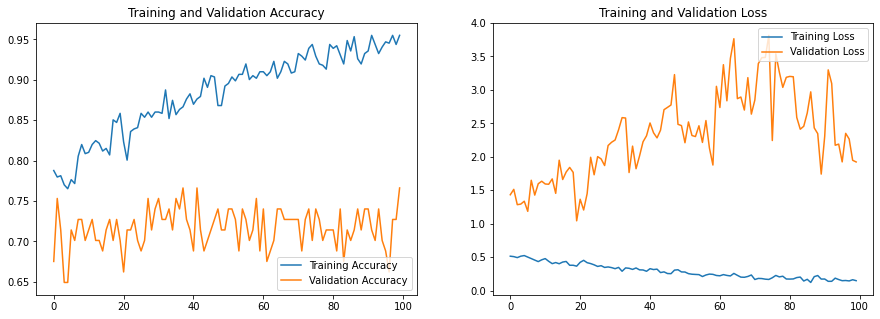

In [51]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    x_test1 = images_batch.numpy().astype('uint8')
    y_test1 = labels_batch.numpy()
    batch_prediction = model.predict(images_batch)
    y_predicted1 = np.argmax(batch_prediction,axis=1)

In [53]:
import numpy as np
for images_batch, labels_batch in test_ds.take(2):
    x_test2 = images_batch.numpy().astype('uint8')
    y_test2 = labels_batch.numpy()
    batch_prediction = model.predict(images_batch)
    y_predicted2 = np.argmax(batch_prediction,axis=1)

In [54]:
import numpy as np
for images_batch, labels_batch in test_ds.take(3):
    x_test3 = images_batch.numpy().astype('uint8')
    y_test3 = labels_batch.numpy()
    batch_prediction = model.predict(images_batch)
    y_predicted3 = np.argmax(batch_prediction,axis=1)

In [56]:
import numpy as np
for images_batch, labels_batch in test_ds.take(4):
    x_test4 = images_batch.numpy().astype('uint8')
    y_test4 = labels_batch.numpy()
    batch_prediction = model.predict(images_batch)
    y_predicted4 = np.argmax(batch_prediction,axis=1)

In [57]:
import numpy as np
for images_batch, labels_batch in test_ds.take(5):
    x_test5 = images_batch.numpy().astype('uint8')
    y_test5 = labels_batch.numpy()
    batch_prediction = model.predict(images_batch)
    y_predicted5 = np.argmax(batch_prediction,axis=1)

In [58]:
x_test = np.concatenate((x_test1, x_test2, x_test3, x_test4, x_test5),axis = 0)

In [59]:
y_test = np.hstack((y_test1, y_test2, y_test3, y_test4, y_test5))

In [60]:
y_predict = np.hstack((y_predicted1, y_predicted2, y_predicted3, y_predicted4, y_predicted5))

In [61]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [62]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.24      0.97      0.38        31
           2       0.00      0.00      0.00        24

    accuracy                           0.23       128
   macro avg       0.08      0.32      0.13       128
weighted avg       0.06      0.23      0.09       128



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
